In [420]:
from tqdm.notebook import tqdm, trange
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from nustattools.stats import derate_covariance
from scipy.stats import chi2, norm
from scipy.special import erf
from scipy.optimize import least_squares

In [2]:
blocks_list = []
for k in [10, 30, 50, 100, 400]:
    l = k // 10
    blocks_list.extend(
        [
            [k - 1, 1],
            [k - 4, 1, 1, 1, 1],
            [l * 5, l * 2, l, l, l],
            [l * 4, l * 2, l * 2, l, l],
            [l * 3, l * 3, l * 2, l, l],
            [l] * 10,
            [l * 2] * 5,
            [l * 3] * 3 + [l],
            [l * 4] * 2 + [l * 2],
            [l * 6, l * 2, l * 2],
            [l * 5, l * 4, l * 1],
        ]
    )
# blocks_list

In [3]:
k_list = [np.sum(blocks) for blocks in blocks_list]

In [4]:
avg_block_list = []
for blocks in blocks_list:
    avg = 0
    for i, n in enumerate(blocks):
        avg += (i + 1) * n
    avg /= np.sum(blocks)
    avg_block_list.append(avg)

In [5]:
derate_list = []
acc = 0.01
for blocks in tqdm(blocks_list):
    k = np.sum(blocks)
    cov = np.full((k, k), np.nan)
    for i, ni in enumerate(blocks):
        bi = int(np.sum(blocks[:i]))
        cov[bi : bi + ni, bi : bi + ni] = np.eye(ni)
    derate_list.append(derate_covariance(cov, accuracy=acc))

  0%|          | 0/55 [00:00<?, ?it/s]

In [6]:
limit_list = []
sigma = 3
gamma = chi2(df=1).cdf(sigma**2)
for k, i in zip(k_list, avg_block_list):
    limit_list.append(
        (np.sqrt(2 * k * (2 * i - 1) * (4 / (9 * (1 - gamma)))) + k)
        / chi2(df=k).ppf(gamma)
    )

In [7]:
var_list = []
for k, i in zip(k_list, avg_block_list):
    var_list.append(2 * k * (2 * i - 1))

In [303]:
blocks_list_b = []
for k in [4, 20, 40, 60, 100, 160, 220, 280, 320, 380]:
    blocks_list_b.extend(
        [
            [1]*k,
            [2]*(k//2),
            [4]*(k//4),
        ]
    )
# blocks_list

In [304]:
k_list_b = [np.sum(blocks) for blocks in blocks_list_b]

In [305]:
avg_block_list_b = []
for blocks in blocks_list_b:
    avg = 0
    for i, n in enumerate(blocks):
        avg += (i + 1) * n
    avg /= np.sum(blocks)
    avg_block_list_b.append(avg)

In [406]:
block_size_list = [k // len(blocks) for k, blocks in zip(k_list, blocks_list)]
block_size_list_b = [k // len(blocks) for k, blocks in zip(k_list_b, blocks_list_b)]

In [307]:
derate_list_b = []
for blocks in tqdm(blocks_list_b):
    k = np.sum(blocks)
    cov = np.full((k, k), np.nan)
    for i, ni in enumerate(blocks):
        bi = int(np.sum(blocks[:i]))
        cov[bi : bi + ni, bi : bi + ni] = np.eye(ni)
    derate_list_b.append(derate_covariance(cov, accuracy=acc))

  0%|          | 0/30 [00:00<?, ?it/s]

In [308]:
limit_list_b = []
sigma = 3
gamma = chi2(df=1).cdf(sigma**2)
for k, i in zip(k_list_b, avg_block_list_b):
    limit_list_b.append(
        (np.sqrt(2 * k * (2 * i - 1) * (4 / (9 * (1 - gamma)))) + k)
        / chi2(df=k).ppf(gamma)
    )

In [309]:
var_list_b = []
for k, i in zip(k_list_b, avg_block_list_b):
    var_list_b.append(2 * k * (2 * i - 1))

In [8]:
import pysr as sr

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [553]:
model = sr.PySRRegressor(
    unary_operators=["sqrt"],
    niterations=50,
    complexity_of_constants=2,
    warm_start=True,
    temp_equation_file=True,
    verbosity=0,
)

In [554]:
#X = pd.DataFrame({"k": k_list + k_list_b, "i": avg_block_list + avg_block_list_b})
X = pd.DataFrame({"k": k_list + k_list_b,
                  "i": avg_block_list + avg_block_list_b,
                  "V": var_list + var_list_b})
y = np.array(derate_list + derate_list_b)

In [573]:
for _ in trange(4*10):
    model.fit(X, y)

  0%|          | 0/40 [00:00<?, ?it/s]

/home/lukas/.local/lib/python3.8/site-packages/pysr/sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/lukas/.local/lib/python3.8/site-packages/pysr/sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/lukas/.local/lib/python3.8/site-packages/pysr/sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/lukas/.local/lib/python3.8/site-packages/pysr/sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/lukas/.local/lib/python3.8/site-packages/pysr/sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/lukas/.local/lib/python3.8/site-packages/pysr/sr.py:2582: UserWarning: Note: it looks like you are 

In [574]:
model

PySRRegressor.equations_ = [
	    pick         score                                           equation  \
	0         0.000000e+00                                                  i   
	1         6.277030e+00                                            sqrt(i)   
	2         4.492431e-01                                      sqrt(sqrt(i))   
	3         2.959869e-01                                sqrt(sqrt(sqrt(V)))   
	4         6.743895e-01                                  sqrt(sqrt(V / k))   
	5         5.393166e-01                            sqrt(sqrt(sqrt(i) * i))   
	6         1.953162e-01                            sqrt(sqrt(V / (k - i)))   
	7         1.167360e+00                     sqrt(i / sqrt(k)) / 0.40926167   
	8         1.024367e-07                sqrt(5.9699545) * sqrt(i / sqrt(k))   
	9         2.600769e-01                  sqrt(sqrt(V * sqrt(V)) / (k - i))   
	10        2.537097e-01        (sqrt(sqrt(sqrt(V)) * V) / k) - -0.66922677   
	11        7.005164e-02           sqrt((V / sqrt(k - i)) / k) + 0.41459954   
	12  >>>>  8.143011e-01  sqrt(sqrt(i)) + ((i / 0.13153805) / (14.146747...   
	13        1.473917e-03  sqrt(sqrt(i)) + (((i / 0.14833274) + i) / (k +...   
	14        2.910722e-01  sqrt(sqrt(i)) + (((i - 0.71952397) / 0.1357622...   
	15        3.370023e-02  (((i / 0.13224064) / (12.094317 + k)) + sqrt(s...   
	16        3.663369e-02  (((i / 0.13224064) / (11.414799 + k)) + sqrt(s...   
	17        3.753866e-03  (sqrt(sqrt(i)) + ((i / 0.13283803) / (k + 11.5...   
	
	           loss  complexity  
	0   1439.400500           1  
	1      2.704596           2  
	2      1.725832           3  
	3      1.283669           4  
	4      0.653988           5  
	5      0.381371           6  
	6      0.313706           7  
	7      0.097621           8  
	8      0.097621           9  
	9      0.075265          10  
	10     0.058400          11  
	11     0.054449          12  
	12     0.024118          13  
	13     0.024047          15  
	14     0.017974          16  
	15     0.016803          18  
	16     0.016198          19  
	17     0.016138          20  
]

In [575]:
from IPython.display import Math, display

display(Math(model.latex()))


<IPython.core.display.Math object>

In [582]:
def approx_fun(k, i, V, x=(120,25,1)):
    #return 1 + (5/2)*((5/3)*np.sqrt(i) + (1/3)*i - 2.0) / np.sqrt(k + i)
    return np.sqrt( 1 + x[0]*(i - np.sqrt(i)) / (1*k + x[1]) )
    #return 1 + 1.5 * (i + np.sqrt(i) - 2) / (0.1*k + 1)
    #return model.predict([[k,i,V]])[0]

approx_list = []
approx_list_b = []
for k, i, V in zip(k_list, avg_block_list, var_list):
    approx_list.append(approx_fun(k,i,V))
for k, i, V in zip(k_list_b, avg_block_list_b, var_list_b):
    approx_list_b.append(approx_fun(k,i,V))

In [583]:
def opt_fun(x):
    return approx_fun(X["k"], X["i"], x) - y

#opt = least_squares(opt_fun, [130,40,1])
#opt

In [584]:
data = pd.DataFrame(
    {
        "k": k_list,
        "$N_i$": block_size_list,
        "alpha": derate_list,
        "approx": approx_list,
        "limit": limit_list,
        "ibar": avg_block_list,
    }
)

In [585]:
data_b = pd.DataFrame(
    {
        "k": k_list_b,
        "$N_i$": block_size_list_b,
        "alpha": derate_list_b,
        "approx": approx_list_b,
        "limit": limit_list_b,
        "ibar": avg_block_list_b,
    }
)

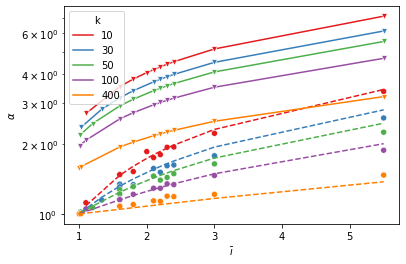

In [586]:
pal = "Set1"
sns.scatterplot(data, x="ibar", y="alpha", hue="k", palette=pal, legend=False)
sns.lineplot(
    data,
    x="ibar",
    y="approx",
    hue="k",
    marker=None,
    palette=pal,
    linestyle="dashed",
    legend=False,
)
sns.lineplot(data, x="ibar", y="limit", hue="k", marker="v", palette=pal)
plt.xlabel(r"$\bar{\imath}$")
plt.ylabel(r"$\alpha$")
plt.yscale("log")
plt.savefig("plots/derate-approx.pdf")

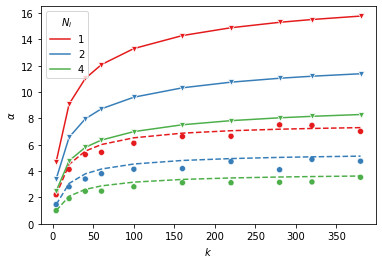

In [587]:
pal = "Set1"
sns.scatterplot(data_b, x="k", y="alpha", hue="$N_i$", palette=pal, legend=False)
sns.lineplot(
    data_b,
    x="k",
    y="approx",
    marker=None,
    hue="$N_i$",
    palette=pal,
    linestyle="dashed",
    legend=False,
)
sns.lineplot(data_b, x="k", y="limit", marker="v", hue="$N_i$", palette=pal)
plt.xlabel(r"$k$")
plt.ylabel(r"$\alpha$")
#plt.yscale("log")
plt.ylim(bottom=0)
plt.savefig("plots/derate-approx-b.pdf")